In [118]:
import polars as pl
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Первичная обработка данных

In [119]:
df = pl.read_excel('./data/24MAG_HW_1_v14.xls', has_header = False)
df = df.rename(dict(zip([f"column_{i}" for i in range(1,7)],
                   ['age', 'num_dependants', 'income', 'years_in_region', 'car_value', 'credit_value'])))
df

age,num_dependants,income,years_in_region,car_value,credit_value
i64,i64,i64,i64,i64,i64
37,2,29900,7,30000,297000
29,0,1500,5,0,4000
33,2,25200,6,null,248000
28,1,24900,3,24000,241000
47,2,8800,15,9000,92000
…,…,…,…,…,…
19,2,8000,12,50000,200000
40,2,14500,10,14000,144000
null,2,12600,15,13000,130000


In [120]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,50.0,50.0,50.0
"""null_count""",3.0,3.0,3.0,2.0,2.0,2.0
"""mean""",38.632653,1.979592,19808.163265,10.12,20920.0,200586.0
"""std""",8.661923,0.989314,10269.490346,4.930703,11527.854465,99386.004866
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0
"""50%""",39.0,2.0,16800.0,11.0,19000.0,200000.0
"""75%""",46.0,3.0,29200.0,14.0,30000.0,293000.0
"""max""",56.0,4.0,43300.0,19.0,50000.0,437000.0


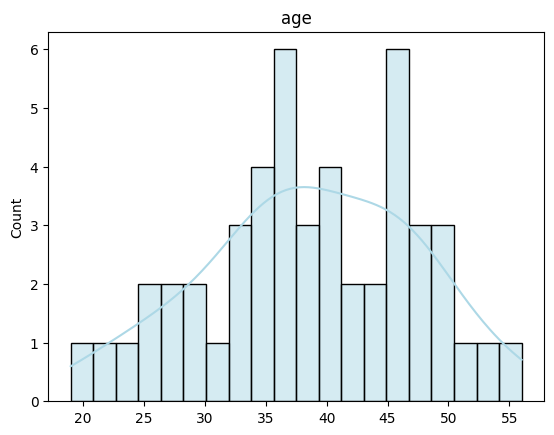

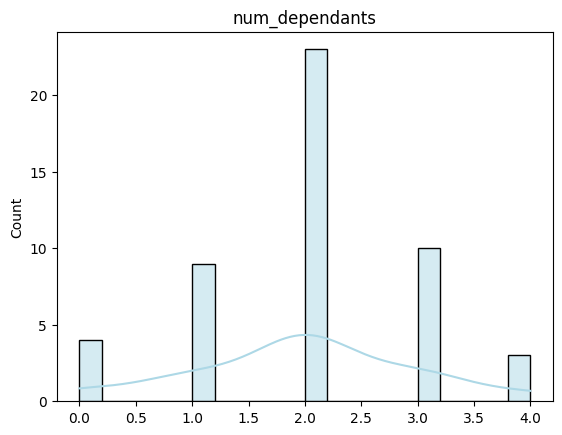

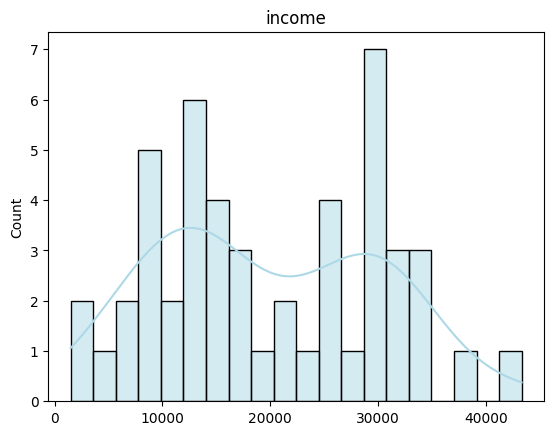

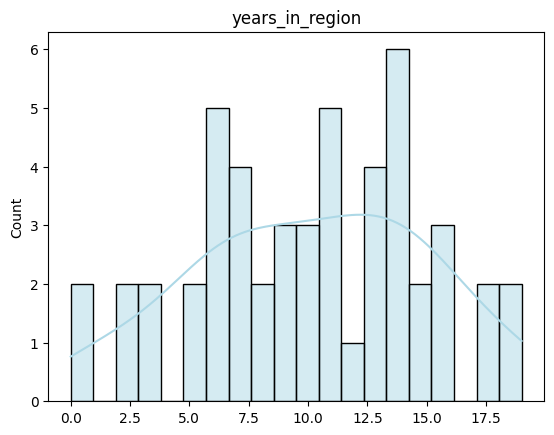

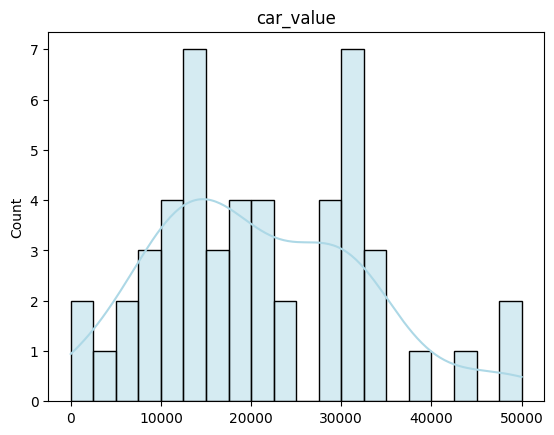

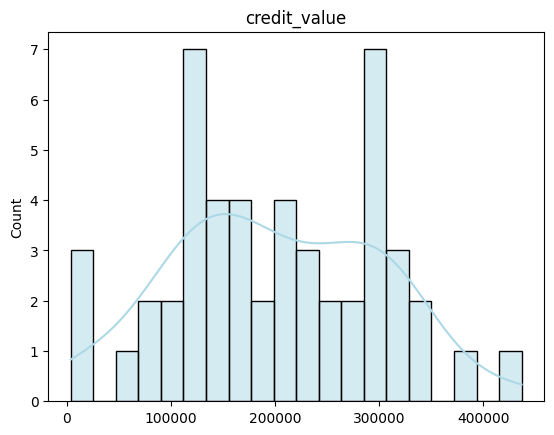

In [121]:
for col_name in df.columns:
    sns.histplot(df[col_name], bins=20, kde=True, color='lightblue', edgecolor='black')
    plt.title(col_name)
    plt.show()

In [122]:
df = df.fill_null(strategy='mean')

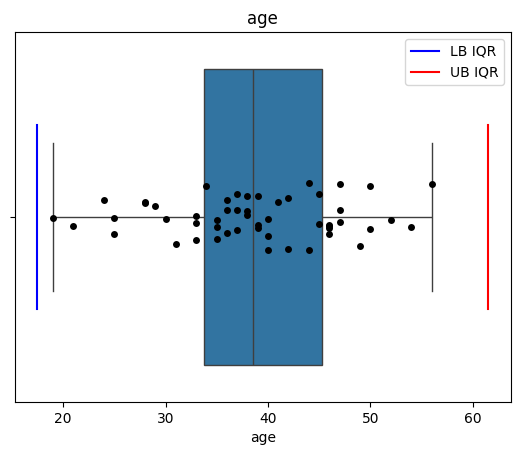

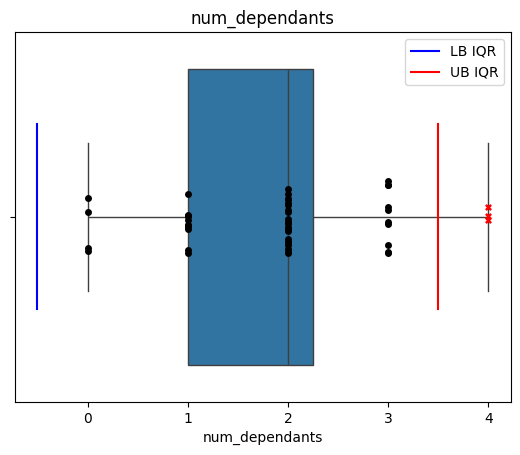

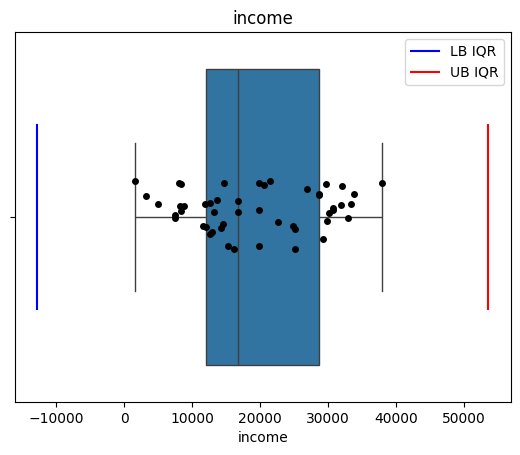

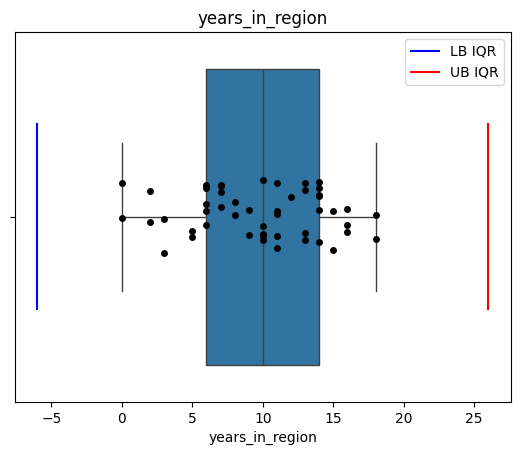

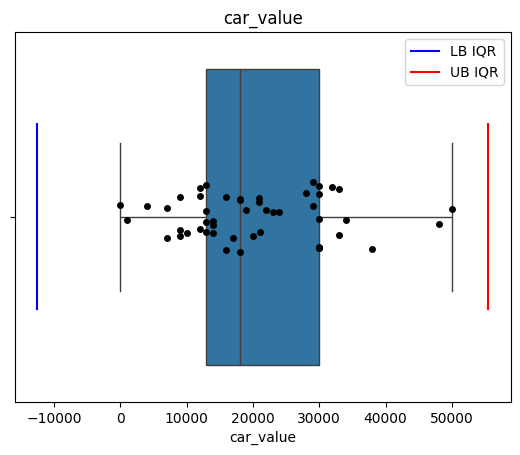

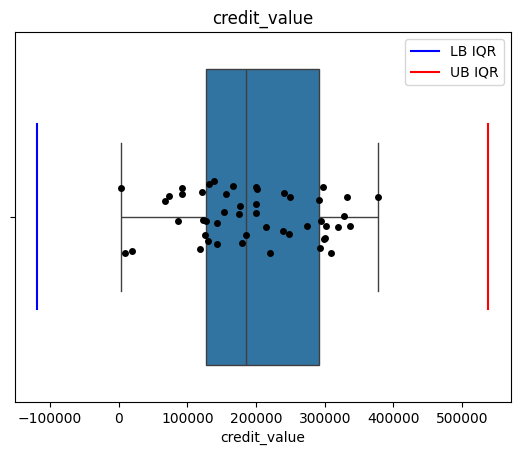

In [123]:
df_orig_size = len(df)

for col_name in df.columns:


    plt.title(col_name)
    sns.boxplot(x=df[col_name])

    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.axvline(lower_bound, ymin=0.25, ymax=0.75, color='b', label = "LB IQR")
    plt.axvline(upper_bound, ymin=0.25, ymax=0.75, color='r', label = "UB IQR")

    sns.stripplot(x=df.filter((pl.col(col_name) >= lower_bound) & (pl.col(col_name) <= upper_bound))[col_name], color='black')
    sns.stripplot(x=df.filter((pl.col(col_name) < lower_bound))[col_name], color='blue', marker="X")
    sns.stripplot(x=df.filter((pl.col(col_name) > upper_bound))[col_name], color='red', marker="X")

    plt.legend()
    plt.show()
    
    df = df.filter((pl.col(col_name) >= lower_bound) & (pl.col(col_name) <= upper_bound))



In [124]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",38.183673,1.795918,19208.653061,9.77551,20282.44898,194172.897959
"""std""",8.265575,0.865534,9639.637488,4.624506,11094.089742,93701.807169
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0
"""50%""",38.0,2.0,16800.0,10.0,18000.0,186000.0
"""75%""",45.0,2.0,28700.0,14.0,30000.0,292000.0
"""max""",54.0,3.0,38000.0,18.0,50000.0,377000.0


# 2. Снижение размерности. Метод PCA 

Центрирование и нормировка

In [125]:
for col_name in df.columns:
    df = df.with_columns((pl.col(col_name) - df[col_name].mean()).alias(col_name))
    df = df.with_columns((pl.col(col_name) / np.linalg.norm(df[col_name].to_numpy())).alias(col_name))

In [126]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-8.2700e-17,-1.0196e-17,2.2658e-18,0.0,6.7973e-18,4.5315e-18
"""std""",0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
"""min""",-0.334995,-0.29949,-0.265158,-0.305108,-0.263881,-0.292941
"""25%""",-0.09052,-0.132728,-0.10644,-0.117839,-0.094747,-0.101932
"""50%""",-0.003207,0.034033,-0.036066,0.007007,-0.029695,-0.012589
"""75%""",0.11903,0.034033,0.142117,0.131852,0.126428,0.150692
"""max""",0.276193,0.200794,0.281369,0.256698,0.386635,0.281626


Найдем SVD разложение

In [127]:
Z = df.to_numpy()

In [128]:
U, S, VT = np.linalg.svd(df.to_numpy())

Найдем ошибки аппроксимации в спектральной норме и в норме Фробениуса и построим их графики зависимости от количества сингулярных чисел

In [129]:
frobenius_errors = []
spectral_errors = []

for i in range(len(S)):
    S_n = S.copy()
    S_n = S_n[:i+1]

    S_n = np.concatenate([np.diag(S_n), np.zeros([U.shape[0] - (i + 1), i + 1])], axis=0)
    
    Z_approx = U @ S_n @ VT[:i+1, ...]
    
    frobenius_errors.append(np.linalg.norm(Z - Z_approx, ord='fro'))
    spectral_errors.append(np.linalg.norm(Z - Z_approx, ord=2))
    

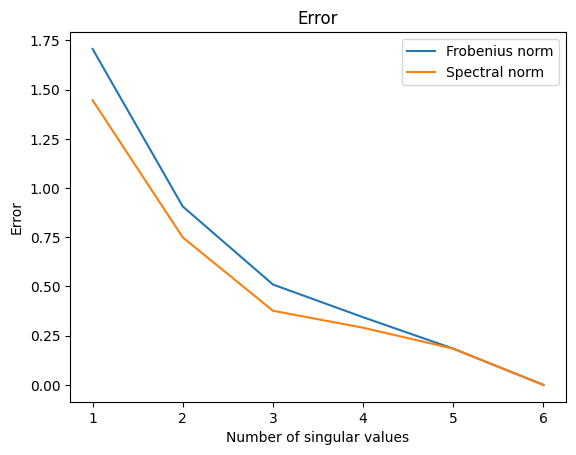

In [130]:
plt.plot(range(1, len(frobenius_errors) + 1), frobenius_errors, label='Frobenius norm')
plt.plot(range(1, len(spectral_errors) + 1), spectral_errors, label='Spectral norm')
plt.title('Error')
plt.xlabel('Number of singular values')
plt.ylabel('Error')
plt.legend()

По графику можно сделать вывод, что хватит 4 фактора.

In [131]:
SUFF_K = 4

In [132]:
S_n = S.copy()
S_n = S_n[:SUFF_K]

S_n = np.concatenate([np.diag(S_n), np.zeros([U.shape[0] - SUFF_K, SUFF_K])], axis=0)

Z_k = U @ S_n

In [133]:
Z_k.shape

(49, 4)

In [134]:
df_with_factors = pl.DataFrame({f"factor_{i+1}":Z_k[:, i] for i in range(Z_k.shape[1])})

In [135]:
df_with_factors

factor_1,factor_2,factor_3,factor_4
f64,f64,f64,f64
-0.252495,0.101062,-0.040468,0.006616
0.23784,-0.551534,0.020796,0.039891
-0.167741,-0.016768,-0.021801,0.0897
-0.266429,-0.191635,-0.014236,0.027733
0.347484,0.026727,-0.011216,-0.017952
…,…,…,…
-0.191044,-0.019831,0.498669,-0.092668
0.126289,-0.025847,-0.001104,0.055688
0.210484,0.005151,0.064711,-0.018093


In [136]:
df_with_factors.describe()

statistic,factor_1,factor_2,factor_3,factor_4
str,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",1.1329e-17,1.2462e-17,-9.0630e-18,-3.9651e-18
"""std""",0.253583,0.208748,0.108162,0.054381
"""min""",-0.470123,-0.603001,-0.094788,-0.170578
"""25%""",-0.235553,-0.105002,-0.041035,-0.02099
"""50%""",0.104046,0.016406,-0.020296,0.005013
"""75%""",0.210484,0.119644,-0.001104,0.03902
"""max""",0.432532,0.327887,0.498669,0.096566


# 3. Вложение MDS.

Матрица расстояний

In [137]:
from scipy.spatial import distance_matrix

In [138]:
d_matrix = np.vstack(distance_matrix(*[df.to_numpy()]*2))

In [139]:
d_matrix.shape

(49, 49)

In [140]:
s_matrix = -0.5 * (np.eye(d_matrix.shape[0]) - np.ones(d_matrix.shape)/d_matrix.shape[0]) @ d_matrix @ (np.eye(d_matrix.shape[0]) - np.ones(d_matrix.shape)/d_matrix.shape[0])

Проверка симметричности

In [141]:
EPS = 1e-15

In [142]:
np.all(np.abs(s_matrix - s_matrix.T) < EPS)

True

Проверка неотрицательной определенности

In [143]:
np.all(np.linalg.eigvals(s_matrix) > 0)

True

--> Матрица расстояний соответствует необходимым условиям для точного вложения.

In [144]:
K_DIMS = 2

In [146]:
k_eig_vals, k_eig_veks = np.linalg.eig(s_matrix)

In [147]:
s_matrix_approx = (k_eig_veks*k_eig_vals**0.5)[:,:K_DIMS] @ (k_eig_veks*k_eig_vals**0.5)[:,:K_DIMS].T

In [148]:
s_matrix_approx.shape

(49, 49)

In [149]:
print(np.linalg.norm(s_matrix - s_matrix_approx, ord='fro'))
print(np.linalg.norm(s_matrix - s_matrix_approx, ord=2))

1.3182813233592763
0.7626802319986787


In [150]:
np.all(np.abs(s_matrix_approx - s_matrix_approx.T) < EPS)

True

In [151]:
np.all(np.linalg.eigvals(s_matrix_approx) > 0)

False

--> Матрица не может быть точно вложена в 2-ух мерное пространство.

In [152]:
from sklearn.manifold import MDS

In [153]:
embedder = MDS(2, dissimilarity='precomputed')

In [154]:
k_dim_embeddings = embedder.fit_transform(d_matrix)

In [155]:
k_dim_embeddings.shape

(49, 2)

In [156]:
d_matrix_k_dim_embs = np.vstack(distance_matrix(*[k_dim_embeddings]*2))

In [157]:
d_matrix_k_dim_embs.shape

(49, 49)

In [158]:
print(np.linalg.norm(d_matrix - d_matrix_k_dim_embs, ord='fro'))
print(np.linalg.norm(d_matrix - d_matrix_k_dim_embs, ord=2))

2.5042844053395386
1.532976495337419


In [159]:
df_with_embs = pl.DataFrame({f"dim_{i+1}":k_dim_embeddings[:, i] for i in range(k_dim_embeddings.shape[1])})

In [160]:
df_with_embs.describe()

statistic,dim_1,dim_2
str,f64,f64
"""count""",49.0,49.0
"""null_count""",0.0,0.0
"""mean""",2.0392e-17,2.4923e-17
"""std""",0.233624,0.26284
"""min""",-0.524438,-0.46894
"""25%""",-0.134874,-0.210175
"""50%""",0.006082,-0.078879
"""75%""",0.095818,0.237978
"""max""",0.635775,0.486209
